## Capstone Project 1 NYC School System
### LaGuardia Community College


### - The New York City school system is the largest in the United States with 995,336 students and 1800 schools. For the last 25 years, the NYC school system has gone through a great transformation to improve the education quality throughout the city.


### - For this project, we will analyze the different average test scores for two Brooklyn High Schools in the the subject of Algebra, English, Global History and Geography: Fort Hamilton High School (the high school I attended) and Franklin Delano Roosevelt YABC. Both schools are in the same district.


### - We need to answer the following questions
 Which school has the highest average score in the regent Algebra, English, Global History and Geography?

   

       
        

#### Let's import the necessary libraries for our analysis

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#### Importing dataset

In [138]:
schools = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

### Checking the Structure of the data

In [139]:
schools.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


#### - We can see that some of the test score are being represented by a "s". It could mean that some of the scores are missing. 
#### - In this case, first I will replace the "s" with nan values so we can dropped the nan values later on.

### Replacing the "s" values with nan.

In [140]:
# Replacing s values with nan using the replace() method and np.nan
schools.replace('s', np.nan, inplace=True)
schools.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


#### For the purpose of my analysis, I am going to create a new column call 'Score Numeric' from Mean Score column (it is an object column). I am going to use pd.to_numeric method.  I want to compare the test score between the two schools for the three subjects mentioned above.

In [142]:
schools['Score Numeric'] = pd.to_numeric(schools['Mean Score'], errors = 'coerce')

In [210]:
schools.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Score Numeric
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na,74.0
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,NaN


In [145]:
print(f'Number of Rows: {schools.shape[0]} rows\nNumber of Columns: {schools.shape[1]} Columns')

Number of Rows: 212331 rows
Number of Columns: 16 Columns


### Checking data types

In [148]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  object 
 7   Number Scoring Below 65      137109 non-null  object 
 8   Percent Scoring Below 65     137109 non-null  object 
 9   Number Scoring 65 or Above   137109 non-null  object 
 10  Percent Scoring 65 or Above  137109 non-null  object 
 11  Number Scoring 80 or Above   137109 non-null  object 
 12  Percent Scoring 80 or Above  137109 non-null  object 
 13 

#### -  The dataset contains 13 object or categorical data type and three integer data type.
#### -  As expected, there a some columns with nulls values.
#### -  Let's confirm how many nulls are in the regent exam column.


In [149]:
schools.isnull().sum()

School DBN                         0
School Name                        0
School Level                       0
Regents Exam                      10
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65        75222
Percent Scoring Below 65       75222
Number Scoring 65 or Above     75222
Percent Scoring 65 or Above    75222
Number Scoring 80 or Above     75222
Percent Scoring 80 or Above    75222
Number Scoring CR                  0
Percent Scoring CR                 0
Score Numeric                  75222
dtype: int64

- Because the nan values in the dataset, there are 75,222 missing values in the columns before mentioned.

- For the purpose of my analysis, I am going to create
another dataset dropping all the missing values.

In [150]:
schools2 = schools.dropna()


In [151]:
schools2.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Score Numeric
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na,74.0
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na,67.4
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na,72.6
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na,64.4
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98,78.4
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4,79.0
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3,50,98,84.8
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2,na,na,83.9
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0,2,8.7,62.9


#### As we can see, We have not missing values.


- Let's now confirm that there are not null values.

In [152]:
schools2.isnull().sum()


School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
Score Numeric                  0
dtype: int64

### Now, let's summarize the statistical parameter of the data using the describe() method.

In [153]:
schools2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,137101.0,2015.957630,0.809277,2015.0,2015.0,2016.0,2017.0,2017.0
Total Tested,137101.0,71.584970,107.837188,6.0,18.0,39.0,82.0,1729.0
Score Numeric,137101.0,65.999558,11.288937,15.0,58.3,65.4,73.4,98.7


- The total test has an average of ~49 and a maximun of 1729. 
- The average Test Score is aroound ~66 and a maximun of 98.7.

In [154]:
schools2.describe(include='object').T

,count,unique,top,freq
School DBN,137101,971,21K525,461
School Name,137101,965,New Visions Charter High School for Advanced Math,913
School Level,137101,6,High school,100930
Regents Exam,137101,14,Common Core Algebra,19549
Mean Score,137101,747,64.3,555
Number Scoring Below 65,137101,445,0,10252
Percent Scoring Below 65,137101,991,0,10252
Number Scoring 65 or Above,137101,944,6,4684
Percent Scoring 65 or Above,137101,991,100,10252
Number Scoring 80 or Above,137101,743,0,29996


 - Common Core Algebra is the most taken test in the dataset by 29,254 times.
 - The most frequent mean score is 64.3 with 555.


## Filtering data to Franklin Delano Rossevelt and Fort Hamilton High School dataset


#### For the purpose of my analyisis, I am going to create a dataset that only shows test scores for Fort Hamilton High School and Franklin Delano Rossevelt High School.

In [155]:
fhh_fdr = schools2[(schools2['School DBN'] == '20K490') | (schools2['School DBN'] == '20K658')]
fhh_fdr

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Score Numeric
12201,20K490,Fort Hamilton High School,High school,Algebra2/Trigonometry,2015,709,67.2,303,42.7,406,57.3,212,29.9,212,29.9,67.2
12202,20K490,Fort Hamilton High School,High school,Algebra2/Trigonometry,2016,669,62.2,379,56.7,290,43.3,159,23.8,159,23.8,62.2
12203,20K490,Fort Hamilton High School,High school,Common Core Algebra,2015,707,66,233,33,474,67,26,3.7,287,40.6,66.0
12204,20K490,Fort Hamilton High School,High school,Common Core Algebra,2016,1248,69.4,364,29.2,884,70.8,232,18.6,702,56.3,69.4
12205,20K490,Fort Hamilton High School,High school,Common Core Algebra,2017,1313,71.7,297,22.6,1016,77.4,373,28.4,872,66.4,71.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185107,20K658,Franklin Delano Roosevelt YABC,High school,U.S. History and Government,2016,8,56.8,5,62.5,3,37.5,0,0,na,na,56.8
185108,20K658,Franklin Delano Roosevelt YABC,High school,U.S. History and Government,2016,9,68.1,2,22.2,7,77.8,1,11.1,na,na,68.1
185109,20K658,Franklin Delano Roosevelt YABC,High school,U.S. History and Government,2016,32,58,22,68.8,10,31.3,1,3.1,na,na,58.0
185110,20K658,Franklin Delano Roosevelt YABC,High school,U.S. History and Government,2016,8,54.8,6,75,2,25,0,0,na,na,54.8


#### Let's check the features of the dataset 

In [156]:
print(f'Number of Rows: {fhh_fdr.shape[0]} Columns \nNumber of Columns: {fhh_fdr.shape[1]} Columns')

Number of Rows: 612 Columns 
Number of Columns: 16 Columns


#### Checking data types

In [157]:
fhh_fdr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 12201 to 185113
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School DBN                   612 non-null    object 
 1   School Name                  612 non-null    object 
 2   School Level                 612 non-null    object 
 3   Regents Exam                 612 non-null    object 
 4   Year                         612 non-null    int64  
 5   Total Tested                 612 non-null    int64  
 6   Mean Score                   612 non-null    object 
 7   Number Scoring Below 65      612 non-null    object 
 8   Percent Scoring Below 65     612 non-null    object 
 9   Number Scoring 65 or Above   612 non-null    object 
 10  Percent Scoring 65 or Above  612 non-null    object 
 11  Number Scoring 80 or Above   612 non-null    object 
 12  Percent Scoring 80 or Above  612 non-null    object 
 13  Number Scorin

### Statistical Summary of the Dataset

In [158]:
fhh_fdr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,612.0,2015.906863,0.786227,2015.0,2015.000,2016.0,2017.0,2017.0
Total Tested,612.0,239.715686,284.249759,6.0,22.000,134.0,352.0,1416.0
Score Numeric,612.0,66.017647,10.210206,30.5,58.475,66.8,73.5,90.4


 - The total tested  column has a mean of ~239 and maximum of 1,416.
 - The test score has an average of 66.018 which a litlle bit higher that the whole system. The highest score is 90.4




In [159]:
fhh_fdr.describe(include='object').T

,count,unique,top,freq
School DBN,612,2,20K490,444
School Name,612,2,Fort Hamilton High School,444
School Level,612,1,High school,612
Regents Exam,612,14,Global History and Geography,71
Mean Score,612,302,72.3,9
Number Scoring Below 65,612,203,6,34
Percent Scoring Below 65,612,365,100,21
Number Scoring 65 or Above,612,301,2,24
Percent Scoring 65 or Above,612,363,0,21
Number Scoring 80 or Above,612,211,0,108


- Fort Hamilton High School (FHHS) that has taken the most exam with 444.
- Global History and Geography was the most taken regents exam with 71.
- The most frequent test score was 72.3.

### Checking the School with the Highest Score in Algebra

- Let's know calculate the average test score to check which of two schools has the highest score in all Algebra subjects.
- Before, let's calculate the average Algebra test score for all the high schools in the system.

In [188]:
algebra_general = schools2[(schools2['Regents Exam'].str.contains('Algebra')) & 
                           (schools2['School Level'] == 'High school')]
print(f'Average Test Score: {algebra_general["Score Numeric"].mean()}')

Average Test Score: 62.42994157340447


In [193]:
## Filtering the data to show only Algebra subject, grouping by school name and calculating the mean
algebra_exam = fhh_fdr[fhh_fdr['Regents Exam'].str.contains('Algebra')].groupby(['School Name'])['Score Numeric'].mean()
algebra_exam = algebra_exam.reset_index() # Reseting indexex to create a dataframe
algebra_exam.columns = ['School Name', 'Algebra Test Score'] # To create two columns in the dataframe
algebra_exam = algebra_exam.sort_values(by='Algebra Test Score', ascending=False) # to sort test score column in a descending order 
algebra_exam

,School Name,Algebra Test Score
0,Fort Hamilton High School,67.185841
1,Franklin Delano Roosevelt YABC,55.074074


- Fort Hamilton High School has the highest averagescore with ~67 in comparison with Franklin Delano Rossevelt YABC with ~55. Fort Hamilton's scores five points higher than the average across all the high schools in the system.
- Now let's create a barplot visualization to compare both scores.

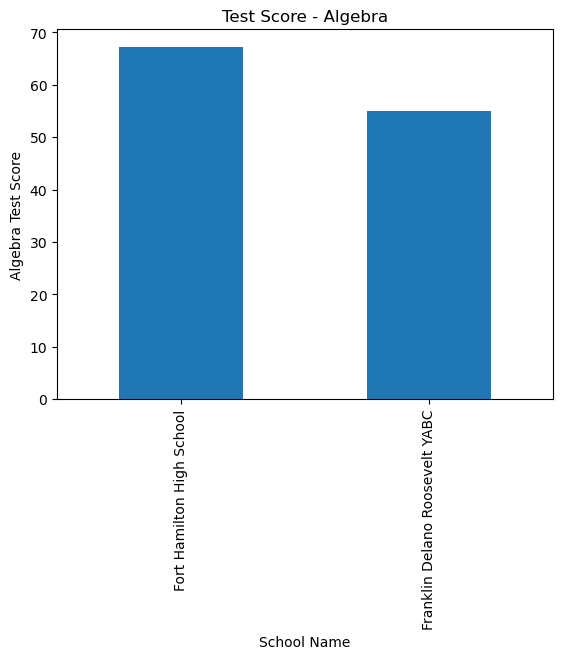

In [197]:
    algebra_exam.plot(kind = 'bar', x='School Name', y='Algebra Test Score',
                      title = 'Test Score - Algebra',
                      xlabel = 'School Name',
                      ylabel = 'Algebra Test Score',
                     legend = False
                     )
    plt.show();

### Checking the School with the Highest Score in English

- Let's compute the average test score to check which of two schools has the highest score in the subject of English.

- Before, let's calculate the average English test score for all the high schools in the system.

In [190]:
english_general = schools2[(schools2['Regents Exam'] == 'English') & 
                           (schools2['School Level'] == 'High school')]
print(f'Average Test Score: {english_general["Score Numeric"].mean()}')

Average Test Score: 64.92429142757756


In [192]:
## Filtering the data to show only Algebra subject, grouping by school name and calculating the mean
english_exam = fhh_fdr[fhh_fdr['Regents Exam'].str.contains('English')].groupby(['School Name'])['Score Numeric'].mean()
english_exam = english_exam.reset_index() # Reseting indexex to create a dataframe
english_exam.columns = ['School Name', 'English Test Score'] # To create two columns in the dataframe
english_exam = english_exam.sort_values(by='English Test Score', ascending=False) # to sort test score column in a descending order 
english_exam

,School Name,English Test Score
0,Fort Hamilton High School,69.256364
1,Franklin Delano Roosevelt YABC,55.085294


- Fort Hamilton High School has the highest average score with ~69 in comparison with Franklin Delano Rossevelt YABC with ~55. Fort Hamilton's scores five points higher than the average across all the high schools in the system.
- Now let's create a barplot visualization to compare both scores.

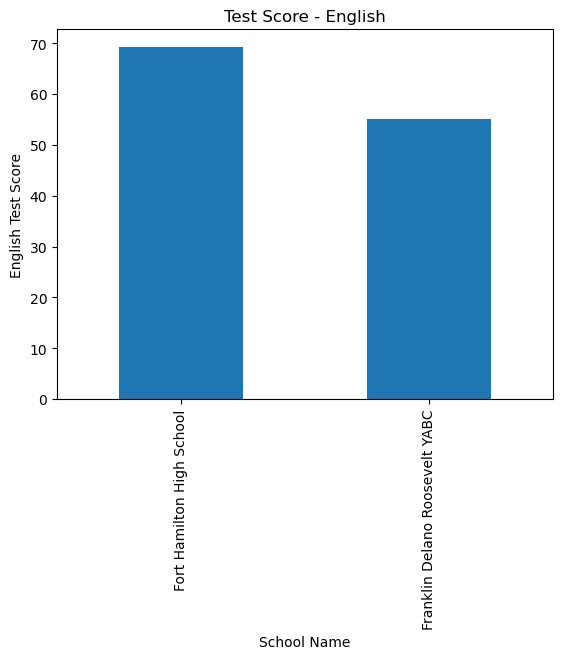

In [198]:
english_exam.plot(kind = 'bar', x='School Name', y='English Test Score',
                  title = 'Test Score - English',
                  xlabel = 'School Name',
                  ylabel = 'English Test Score',
                 legend = False
                 )
plt.show();

### Checking the School with the Highest Score in U.S. History and Government

- Let's compute the average test score to check which of two schools has the highest score in the subject of U.S. History and Government.

- Before, let's calculate the average U.S. History and Government test scores for all the high schools in the system.

In [199]:
hist_gov_general = schools2[(schools2['Regents Exam'] == 'U.S. History and Government') & 
                           (schools2['School Level'] == 'High school')]
print(f'Average Test Score: {hist_gov_general["Score Numeric"].mean()}')

Average Test Score: 69.94277866383145


In [204]:
## Filtering the data to show only Algebra subject, grouping by school name and calculating the mean
hist_gov_exam = fhh_fdr[fhh_fdr['Regents Exam'].str.contains('U.S. History and Government')].groupby(['School Name'])['Score Numeric'].mean()
hist_gov_exam = hist_gov_exam.reset_index() # Reseting indexex to create a dataframe
hist_gov_exam.columns = ['School Name', 'U.S. History and Government Test Score'] # To create two columns in the dataframe
hist_gov_exam = hist_gov_exam.sort_values(by='U.S. History and Government Test Score', ascending=False) # to sort test score column in a descending order 
hist_gov_exam

,School Name,U.S. History and Government Test Score
0,Fort Hamilton High School,78.830769
1,Franklin Delano Roosevelt YABC,59.245161


- Fort Hamilton High School has the highest average score with ~78 in comparison with Franklin Delano Rossevelt YABC with ~59. Fort Hamilton's scores eight points higher than the average across all the high schools in the system.
- Now let's create a barplot visualization to compare both scores.

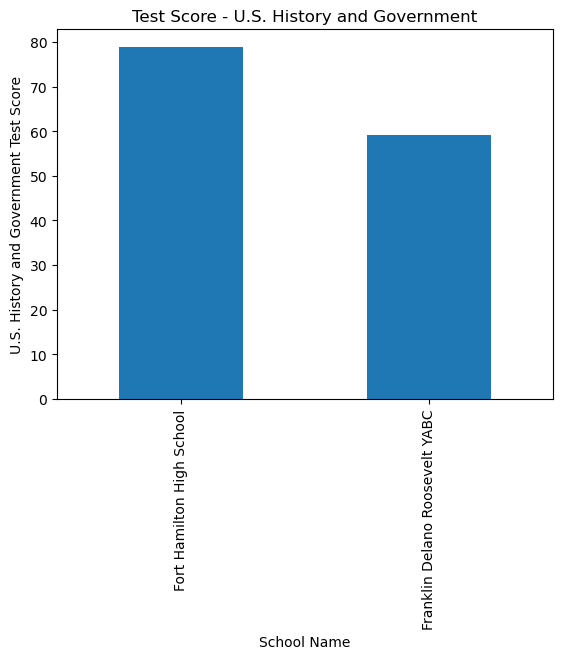

In [207]:
hist_gov_exam.plot(kind = 'bar', x='School Name', y='U.S. History and Government Test Score',
                  title = 'Test Score - U.S. History and Government',
                  xlabel = 'School Name',
                  ylabel = 'U.S. History and Government Test Score',
                 legend = False
                 )
plt.show();

In [208]:
fhh_fdr.Year.unique()

array([2015, 2016, 2017], dtype=int64)

## Conclusion

- Fort Hamilton has higher test score than Franklin Delano Rossevelt YABC in three subjects:
    1. Algebra
    2. English
    3. U.S. History and Government
- Fort Hamilton High School average test score for these threes is even higher than all other high school overall.
- The City Board of Education should invest in more tutoring programs for the students in Franklin Delano Rosselvet YABC so students may improve their performance in the regent exams on these three subjects.